In [176]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [177]:
# fix a random seed for reproducible results
RANDOM_SEED = 42

In [178]:
# make sure you have the data set on the same path, or change the method argument to point to it
data = pd.read_csv("test_task.csv")

In [179]:
# we have 4157 rows and 22 columns
data.shape

(4157, 22)

In [180]:
# prints a (pseudo-)random sample of 10 rows
data.sample(n=10, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


# Dataset Description

The dataset consists of **4,157 entries** and **22 columns** representing various attributes related to loans, customer demographics, payment history, and overdue information. Below is a detailed description of each column:

1. **loanKey (int64)**: A unique identifier for each loan.
2. **rep_loan_date (object)**: The date when the loan was reported (likely in string format).
3. **first_loan (object)**: The date when the first loan was issued to the customer.
4. **dpd_5_cnt (float64)**: Count of instances where the customer was 5 days past due. Non-null for 675 entries, meaning only 16.2% of the data have values for this column.
5. **dpd_15_cnt (float64)**: Count of instances where the customer was 15 days past due. Similar to the `dpd_5_cnt`, only 16.2% of entries have values here.
6. **dpd_30_cnt (float64)**: Count of instances where the customer was 30 days past due. Again, non-null for 675 entries (16.2%).
7. **first_overdue_date (object)**: The date when the first overdue occurred. Non-null for 675 entries, corresponding to the customers with overdue information.
8. **close_loans_cnt (float64)**: The number of loans closed by the customer. Non-null for 4,142 entries (99.6%), meaning most customers have data here.
9. **federal_district_nm (object)**: The name of the federal district the customer belongs to. This field is missing for 11 entries (99.7% complete).
10. **TraderKey (int64)**: A unique identifier for the trader or loan provider.
11. **payment_type_0 (int64)**: Indicator for payment type 0, where the values likely represent different modes of payment.
12. **payment_type_1 (int64)**: Indicator for payment type 1.
13. **payment_type_2 (int64)**: Indicator for payment type 2.
14. **payment_type_3 (int64)**: Indicator for payment type 3.
15. **payment_type_4 (int64)**: Indicator for payment type 4.
16. **payment_type_5 (int64)**: Indicator for payment type 5. (The values in payment_type columns are all non-null and appear to be mutually exclusive, representing categorical payment types.)
17. **past_billings_cnt (float64)**: Number of past billings for the customer. Non-null for 3,909 entries (94% complete).
18. **score_1 (float64)**: A first credit score (e.g., internal score or risk score). Available for 3,507 entries (84% complete).
19. **score_2 (float64)**: A second credit score, possibly from an external or third-party agency. Only available for 239 entries (5.7% complete).
20. **age (float64)**: The age of the customer. All values are present (no missing data).
21. **gender (bool)**: A boolean field indicating the gender of the customer. Non-null for all entries.
22. **bad_flag (int64)**: A binary flag indicating whether the customer is classified as a "bad" customer (e.g., defaulted loan). All values are present, and it likely represents a target variable for a classification task.

### Summary of Missing Data:
- Some columns (like `dpd_*` and `first_overdue_date`) have data available for only 16.2% of customers, likely indicating overdue-specific data.
- `close_loans_cnt`, `federal_district_nm`, and `past_billings_cnt` have minimal missing data (< 6%).
- The second credit score (`score_2`) is largely incomplete (only 5.7% have values).
- Customer demographics (age, gender) and payment type indicators are complete.

### Potential Uses:
- **Loan Default Prediction**: The dataset could be used to predict whether a customer will become a "bad" customer based on their past payment behavior, credit scores, and demographics.
- **Credit Risk Analysis**: Use the overdue counts and credit scores to analyze customer risk profiles.
- **Customer Segmentation**: Group customers based on demographics, payment patterns, and overdue history for targeted actions.



In [181]:
# prints number of non-null values and type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [182]:
data["loanKey"].nunique()

4157

In [183]:
# we manually select numerical columns to describe,
# but we intentionally ignore the target variable (bag_flag) and 'key' columns
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [184]:
# next, we 'describe' the categorical columns
# note that the output differs between the two calls to `.describe()`
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


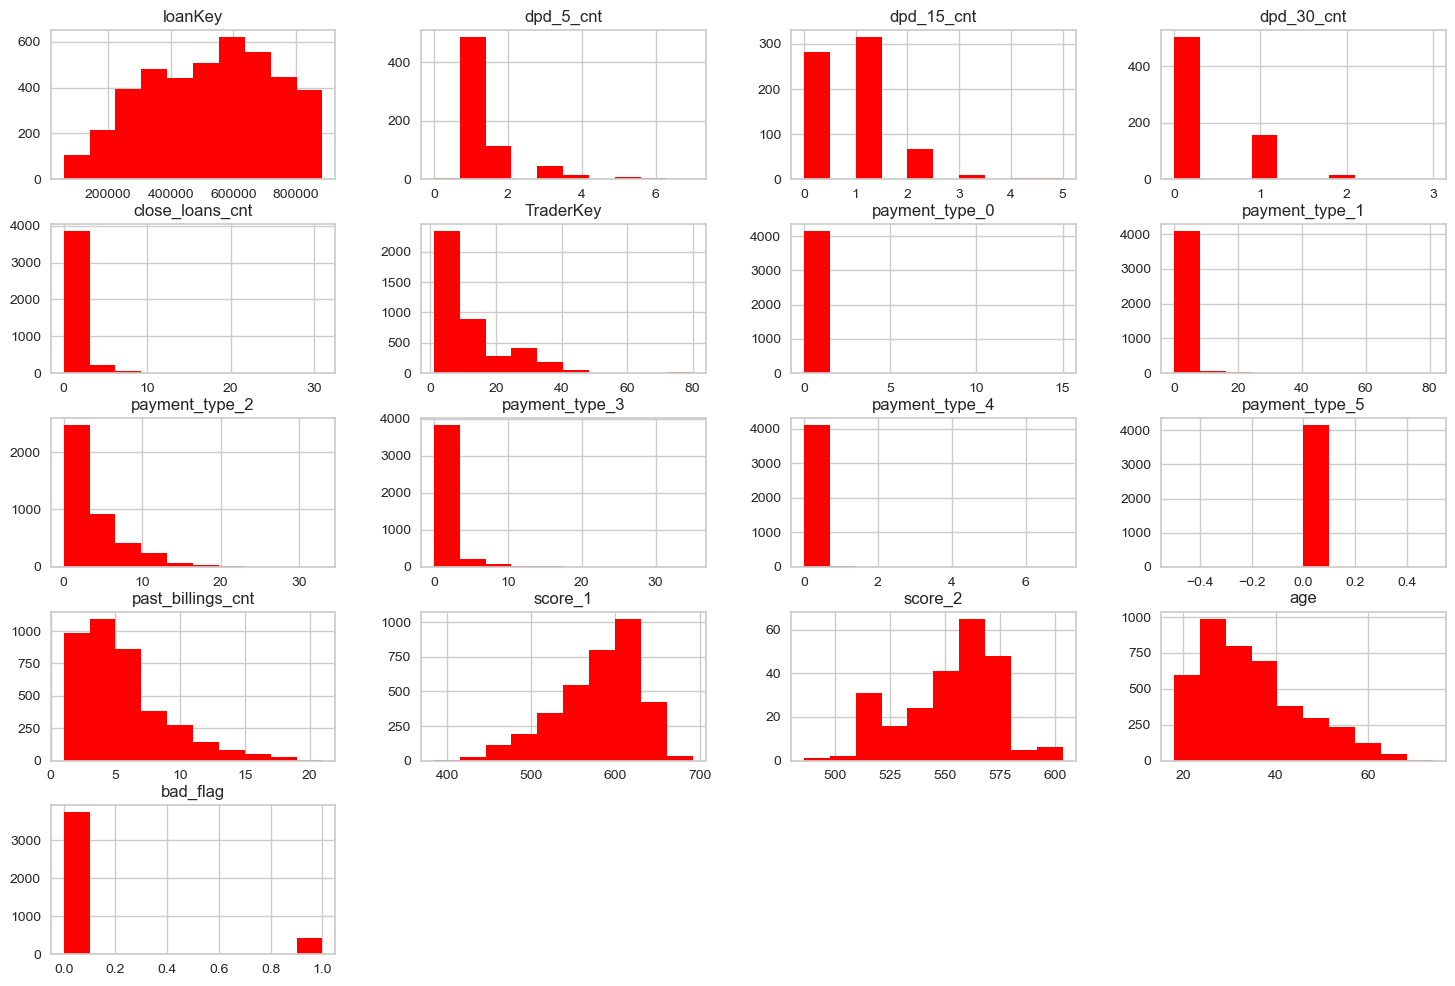

In [185]:
_ = data.hist(figsize=(18, 12), color="red")

In [186]:
# target variable distribution
data["bad_flag"].value_counts()

bad_flag
0    3740
1     417
Name: count, dtype: int64

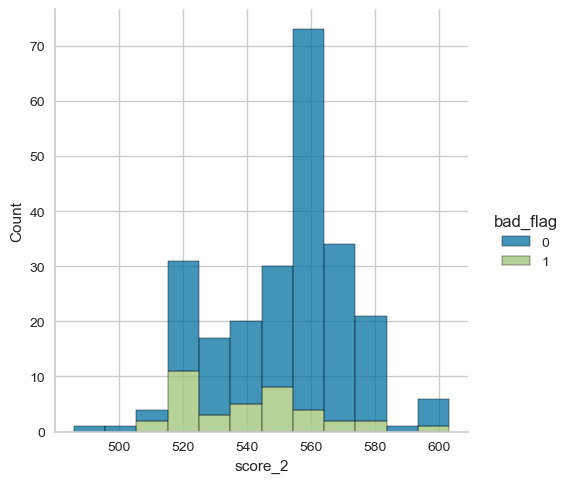

In [187]:
from seaborn import displot

_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")

#Feature Engineering
When working with temporal data, and you have dates in your features, a common consideration is to take the date difference as a feature (how much time it took between events).

In [188]:
# calculate difference in days between the first and the repeated loan
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days

In [189]:
data

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,5,0,0,5.0,NaN,NaN,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,0,0,0,6.0,NaN,NaN,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,3.0,NaN,NaN,33.0,False,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,0,0,0,NaN,NaN,563.089780,26.0,False,0,25
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,3.0,NaN,576.875277,38.0,False,1,148
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,4.0,NaN,554.816921,21.0,False,0,128
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,0,0,0,4.0,NaN,563.089780,35.0,False,0,147


Next, we have the categorical variables. We have two in our data: gender and federal_region. The gender can be directly input into the model - it should get mapped to True -> 1 and False -> 0. For the federal regions, for which we have eight possible values, we can use the pandas' get_dummies() method to generate 'dummy' columns for it.

In [190]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal")

In [191]:
federal_districts

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
4152,False,False,False,False,False,True,False,False
4153,False,False,True,False,False,False,False,False
4154,False,False,True,False,False,False,False,False
4155,False,False,False,False,False,False,True,False


Let's add the "dummy" variables to the original DataFrame. Then, we fill the NaN values with zero as the last pre-processing step and continue with the algorithm selection step.

In [192]:
data = pd.concat(objs=[data, federal_districts], axis=1)

In [193]:
# since most of the classifiers we're evaluating don't accept NaN values,
# we're replacing them with zeros - a neutral value
data.fillna(value=0, inplace=True)

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   loanKey                          4157 non-null   int64         
 1   rep_loan_date                    4157 non-null   datetime64[ns]
 2   first_loan                       4157 non-null   datetime64[ns]
 3   dpd_5_cnt                        4157 non-null   float64       
 4   dpd_15_cnt                       4157 non-null   float64       
 5   dpd_30_cnt                       4157 non-null   float64       
 6   first_overdue_date               4157 non-null   object        
 7   close_loans_cnt                  4157 non-null   float64       
 8   federal_district_nm              4157 non-null   object        
 9   TraderKey                        4157 non-null   int64         
 10  payment_type_0                   4157 non-null   int64      

In [195]:
data.sample(n=7, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
2481,798820,2016-11-07,2015-09-07,0.0,0.0,0.0,0,7.0,region_3,6,...,0,427,False,False,False,True,False,False,False,False
308,612648,2016-08-18,2016-02-08,0.0,0.0,0.0,0,1.0,region_6,12,...,0,192,False,False,False,False,False,False,True,False
2414,452498,2016-04-20,2016-03-12,0.0,0.0,0.0,0,0.0,region_2,12,...,1,39,False,False,True,False,False,False,False,False
2720,580963,2016-07-22,2015-08-14,0.0,0.0,0.0,0,1.0,region_6,26,...,0,343,False,False,False,False,False,False,True,False
463,518998,2016-06-01,2015-09-29,0.0,0.0,0.0,0,1.0,region_3,6,...,0,246,False,False,False,True,False,False,False,False
1185,295047,2015-12-23,2015-12-22,0.0,0.0,0.0,0,0.0,region_2,6,...,0,1,False,False,True,False,False,False,False,False
96,247067,2015-11-17,2015-10-15,0.0,0.0,0.0,0,0.0,region_3,12,...,1,33,False,False,False,True,False,False,False,False


# Algorithm Selection
The problem we are facing is binary classification - we are trying to predict whether a customer is 'bad'. In this section, we will try different classifiers from the scikit-learn library.

Precision, recall, and F1 score and the most common metrics for evaluating classifiers.

In the following few cells, we are going to build a few classifiers and evaluate them - first on the F1 score, and later on all three aforementioned metrics in a more visual and intuitive format.

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [197]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_districts.columns)

In [198]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

Small note here. The hyperparameters for the classifiers are set randomly at this point. In a later section, we perform hyperparameter optimization, which, is highly recommended in any real-world project and is a highly-valued skill, so keep on going through this project!

In [199]:
import numpy as np

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


In [200]:
# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED) ]

In [201]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.23841059602649006
KNeighborsClassifier : 0.2018348623853211
LogisticRegression : 0.06521739130434782
LogisticRegressionCV : 0.044444444444444446
BaggingClassifier : 0.12612612612612611
GaussianNB : 0.22459893048128343
RandomForestClassifier : 0.163265306122449
ExtraTreesClassifier : 0.15533980582524273


Based on the results from the F1 scores above, which model is performing the best and which one is the worst?

The yellowbrick classification report enables us to see the model's performance on different classes. Try to empirically evaluate the reports and determine the best model/algorithm.

In [202]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [203]:
from yellowbrick.classifier import ClassificationReport

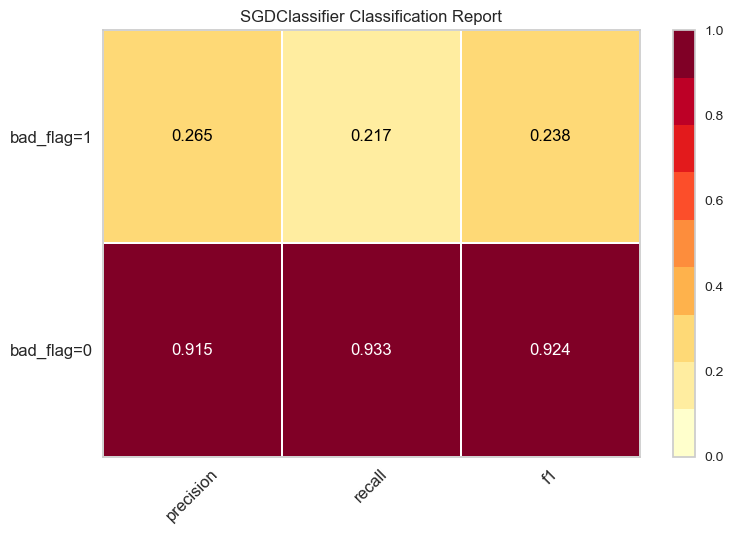

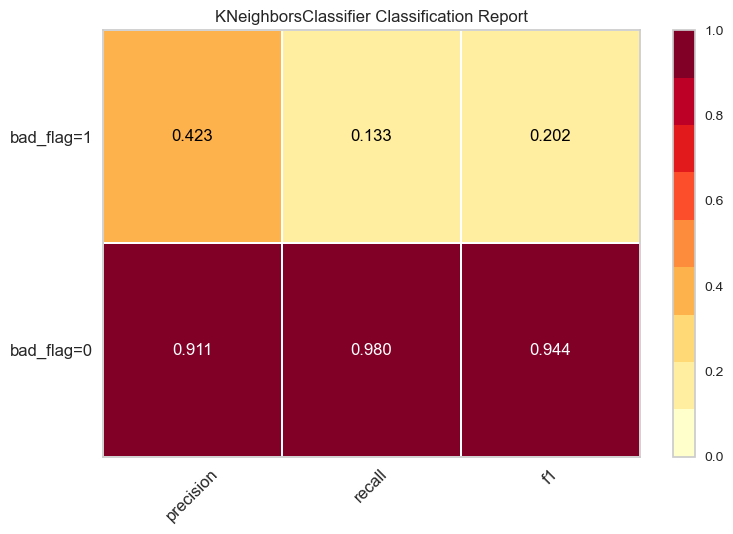

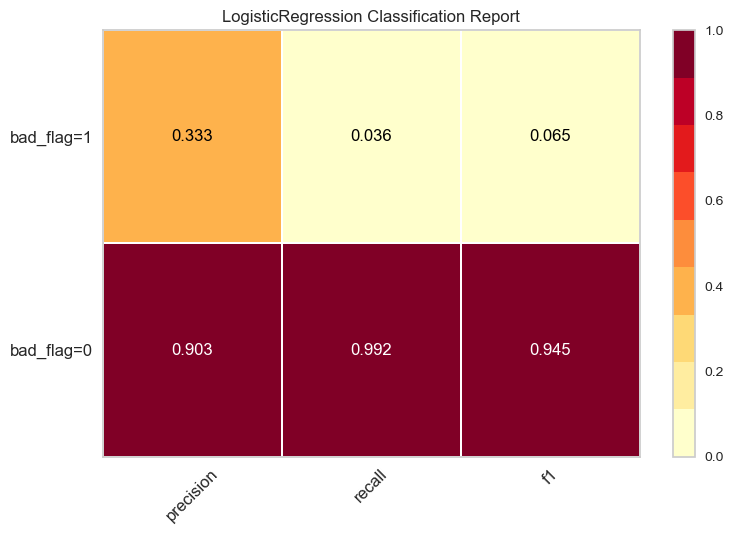

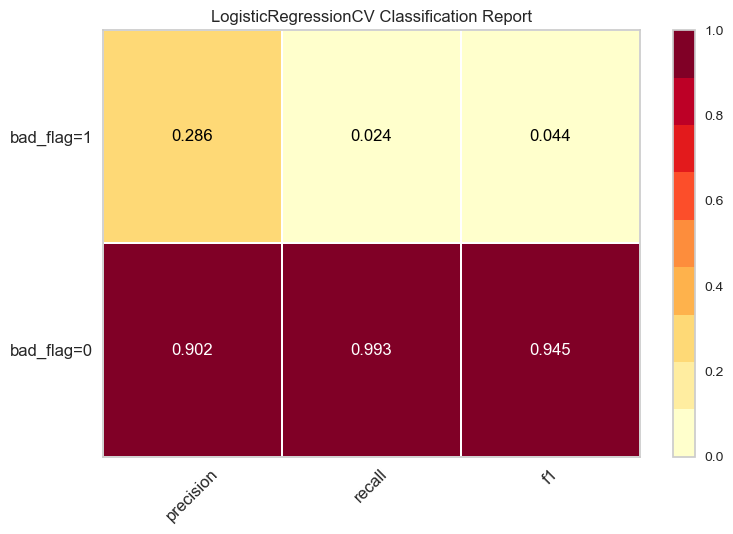

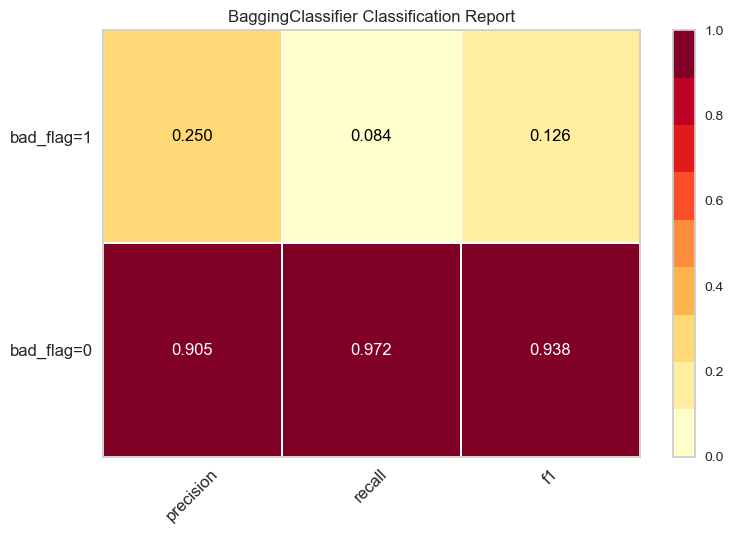

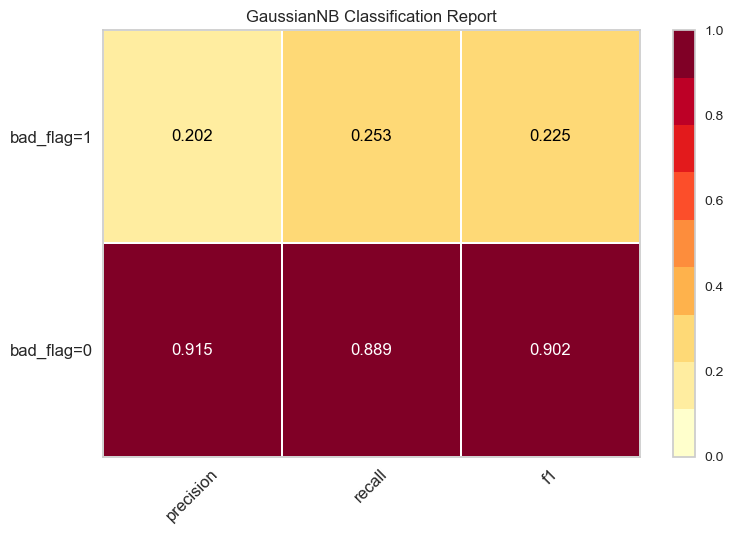

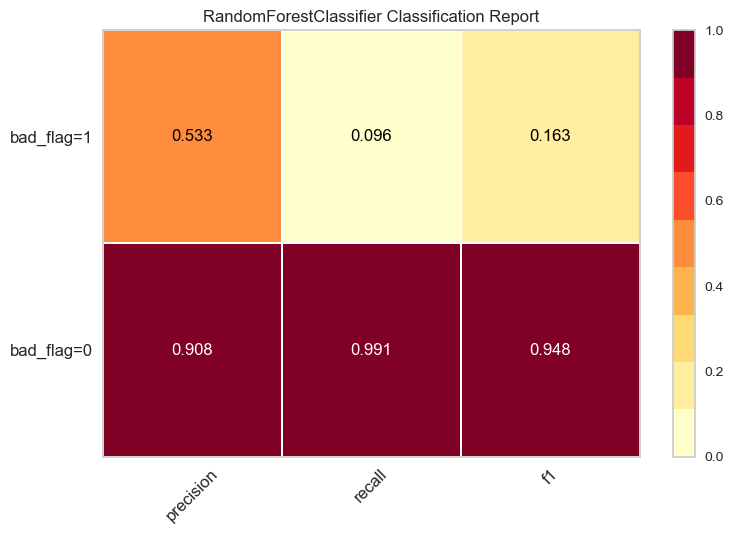

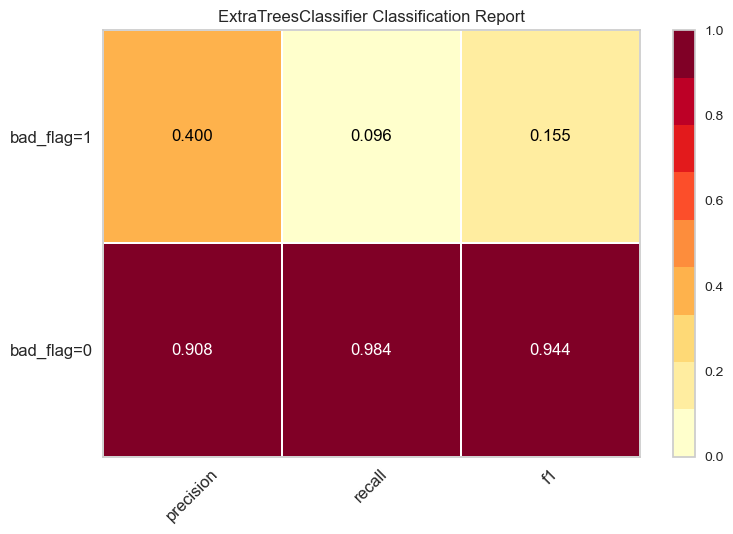

In [204]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Addressing Class-Imbalance

The challenge with class-imbalanced data sets is that most machine learning algorithms ignore, or perform poorly on the minority class, which often is the most important class. To address the class imbalance, numerous methods have been developed. Amongst others, the most popular seem to be the following:

* Over-sampling the minority class
* Under-sampling the majority class
* Assigning class weights to the data samples
* Synthetically generating new data, e.g., SMOTE
The goal of these methods is to bring more balanced class distribution into the data, in the hope that it will improve the performance of a machine learning algorithm, i.e., we would be able to build a better model.

In this project, we will illustrate the **under-sampling** of the majority class. Feel free to try any other technique and see if you can come up with a better model.

In [205]:
## under-sampling
pos_examples = data["bad_flag"].sum()
neg_examples = data.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# we keep all positive examples
pos = data[data["bad_flag"] == 1]
# we use pandas' sample method to take randomly 20% of the negative / majority class
neg = data[data["bad_flag"] == 0].sample(frac=0.15, random_state=RANDOM_SEED)

print("Negative examples after under-sampling", neg.shape[0])

# concatenating the positive and sub-sampled negative examples
data = pd.concat(objs=[pos, neg])

print("Final data shape", data.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 561
Final data shape (978, 31)


In [206]:
# perform another train / test split with the new sampled data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

In [207]:
import numpy as np

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


Now, let's again iterate over our set of classifiers and see how they perform on the new, sub-sampled data.

In [208]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.5627376425855513
KNeighborsClassifier : 0.5882352941176471
LogisticRegression : 0.513888888888889
LogisticRegressionCV : 0.6308724832214766
BaggingClassifier : 0.6027397260273972
GaussianNB : 0.5109489051094891
RandomForestClassifier : 0.6451612903225805
ExtraTreesClassifier : 0.6451612903225805


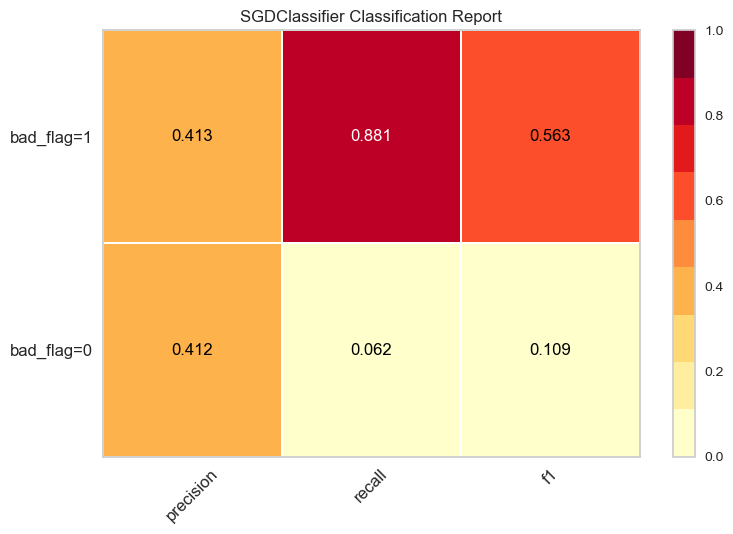

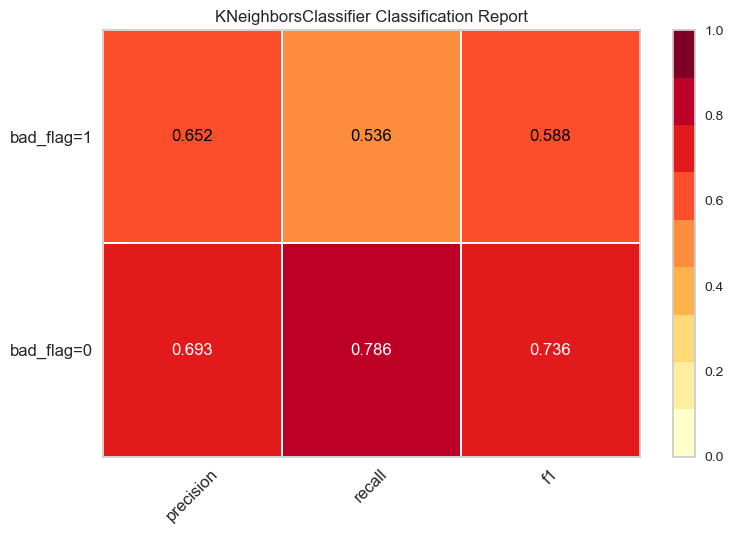

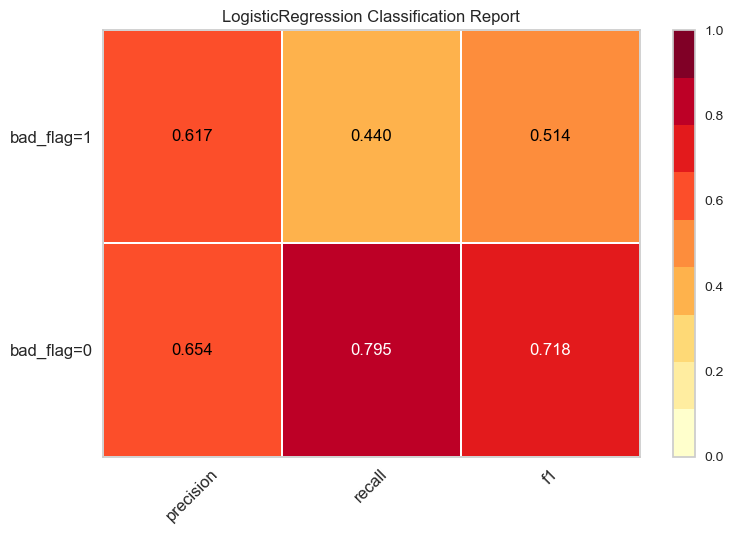

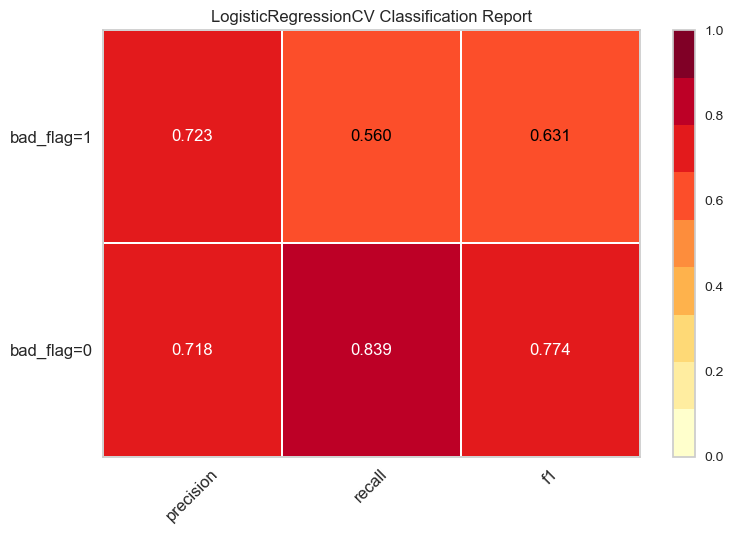

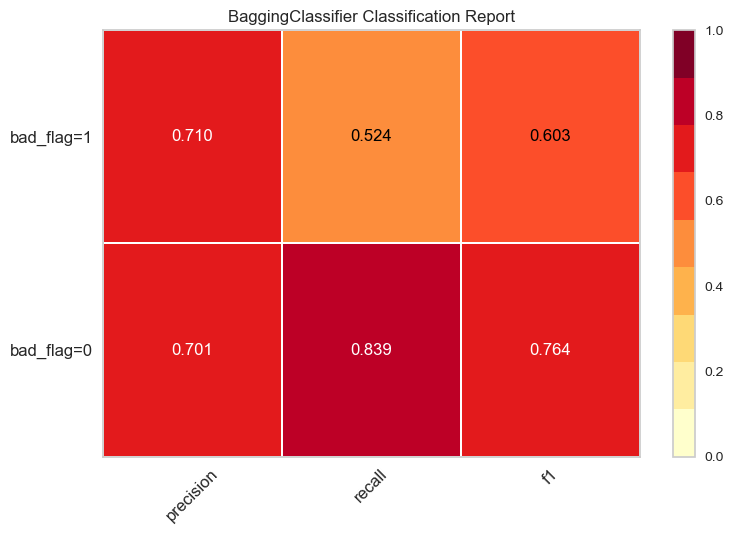

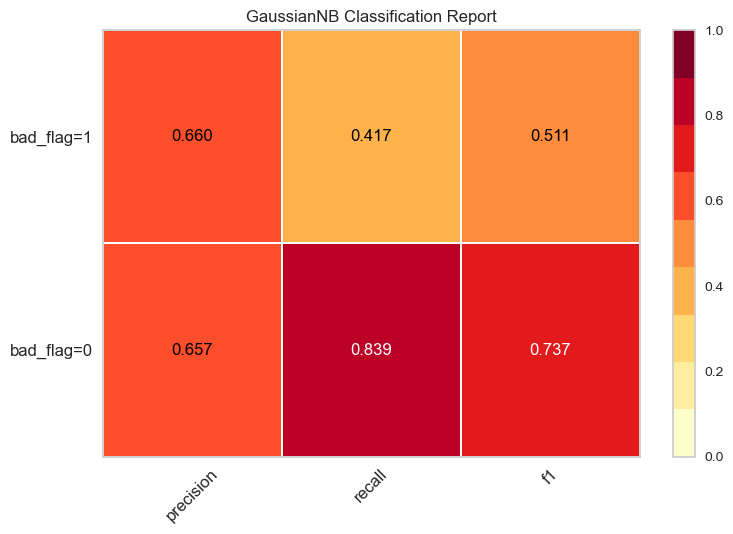

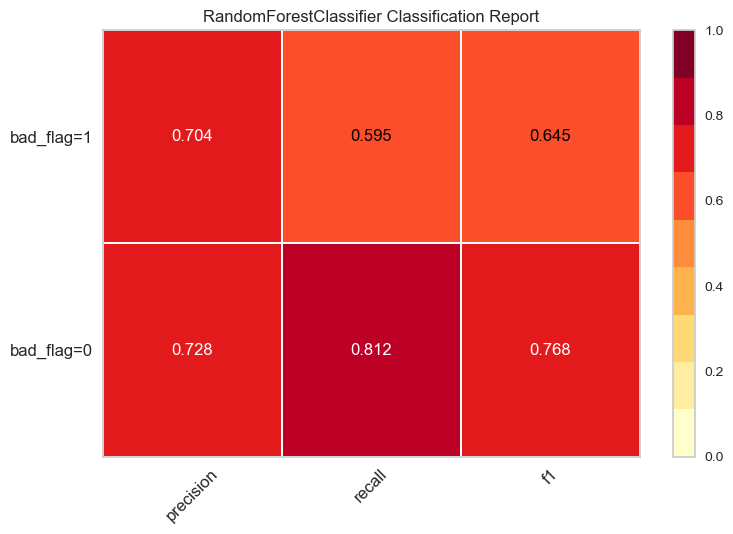

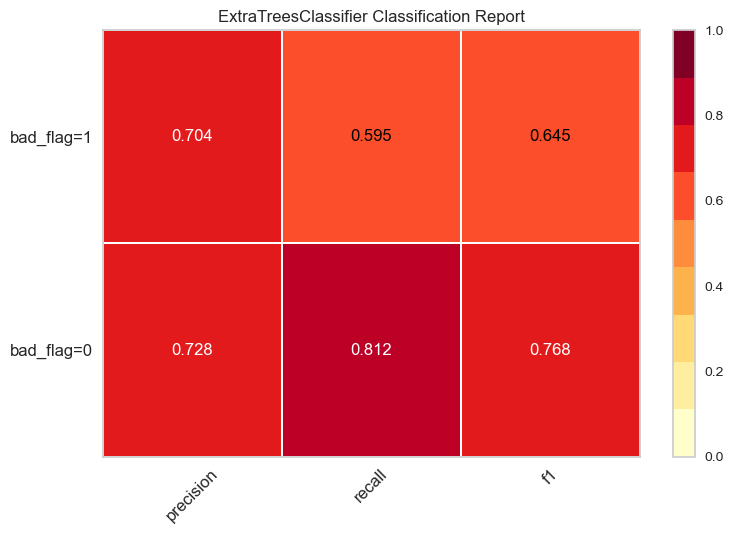

In [209]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

Hyperparameter Optimisation
Upon examining the classification reports, we have determined that the KNeighbors exhibits the best performance overall.

All models score similarly for the negative (majority) class, and the KNeighbors algorithm gives the highest F1 score for the positive (minority) class.

In this section, we will try to further improve the algorithm by modifying some of its hyperparameters.

We will use the Optuna framework. Choosing which hyperparameters to tune requires in-depth knowledge of the workings of a particular algorithm.

For our KNeighbors classifier we have decided to modify the:

The number of neighbors used during inference
The weight function used for prediction
The algorithm used to compute the nearest neighbors
Feel free to tweak the boundaries of the parameters, or remove some; see if you can come up with a better model. Make sure you have read the documentation about the classifier and understand how the hyperparameters influence the algorithm!

In [ ]:
pip install optuna

In [211]:
import optuna

In [212]:
def objective(trial: optuna.Trial):
    """The objective function that we will try to maximize."""
    # suggest min. and max. values for the parameters that we want to tune
    n_neighbors = trial.suggest_int(name="n_neighbors", low=1, high=10)
    weights = trial.suggest_categorical(name="weights", choices=["uniform", "distance"])
    algorithm = trial.suggest_categorical(name="algorithm", choices=["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int(name="leaf_size", low=1, high=40)
    p = trial.suggest_categorical(name="p", choices=[1, 2])

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

    classifier = classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    return f1_score(y_true=y_test, y_pred=y_pred)

In [213]:
# make the sampler behave in a deterministic way.
sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction='maximize', study_name="KNeigbors", sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2024-10-23 14:04:43,109] A new study created in memory with name: KNeigbors
[I 2024-10-23 14:04:43,172] Trial 0 finished with value: 0.5507246376811594 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 1}. Best is trial 0 with value: 0.5507246376811594.
[I 2024-10-23 14:04:43,178] Trial 1 finished with value: 0.6233766233766234 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 8, 'p': 2}. Best is trial 1 with value: 0.6233766233766234.
[I 2024-10-23 14:04:43,210] Trial 2 finished with value: 0.5882352941176471 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 19, 'p': 1}. Best is trial 1 with value: 0.6233766233766234.
[I 2024-10-23 14:04:43,225] Trial 3 finished with value: 0.5401459854014599 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 38, 'p': 1}. Best is trial 1 with value: 0.62337662337

In [214]:
study.best_params

{'n_neighbors': 7,
 'weights': 'uniform',
 'algorithm': 'brute',
 'leaf_size': 26,
 'p': 1}

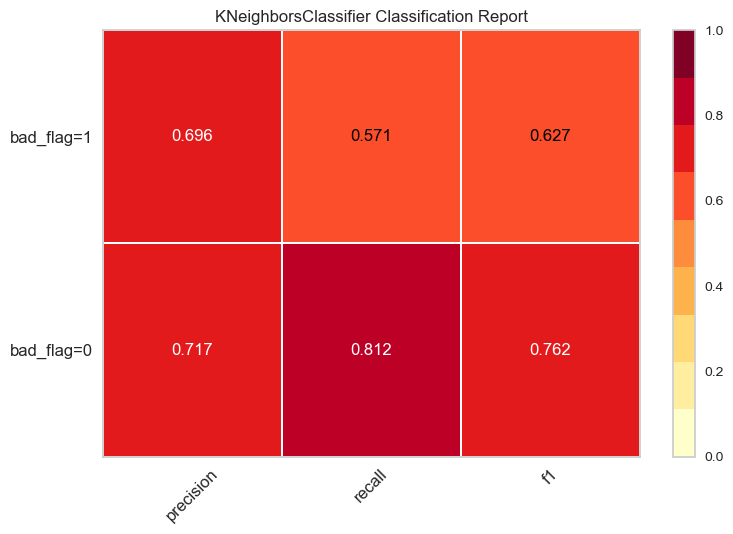

In [215]:
visualizer = ClassificationReport(KNeighborsClassifier(**study.best_params), classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
_ = visualizer.show()

The AUC metric (which is fairly popular and universal in classification problems) is the ratio between false and true positive rates. Plotting the ROC curve answers the requirement in the question. To construct the curve, the data is sorted in decreasing order of probability and the false and true positive rate is plotted. Therefore, we can estimate at any point in the curve how many true and false positive examples the model would predict.

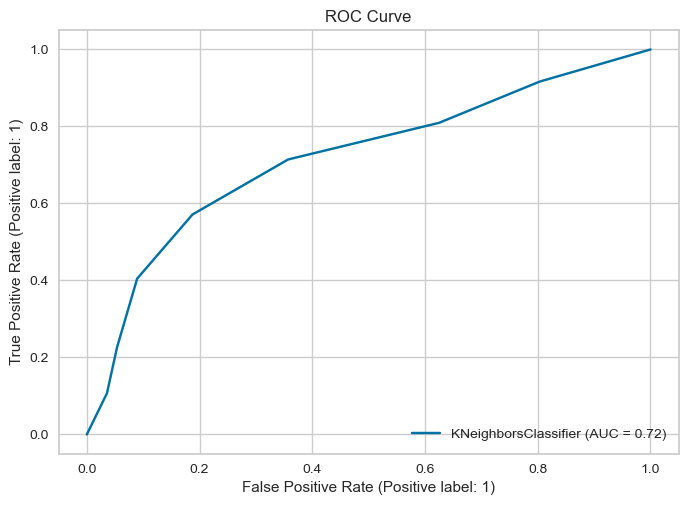

In [216]:
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize and fit the model with the best parameters found by your study
clf = KNeighborsClassifier(**study.best_params)
clf.fit(X_train, y_train)

# Use the new method to plot the ROC curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve')
plt.show()


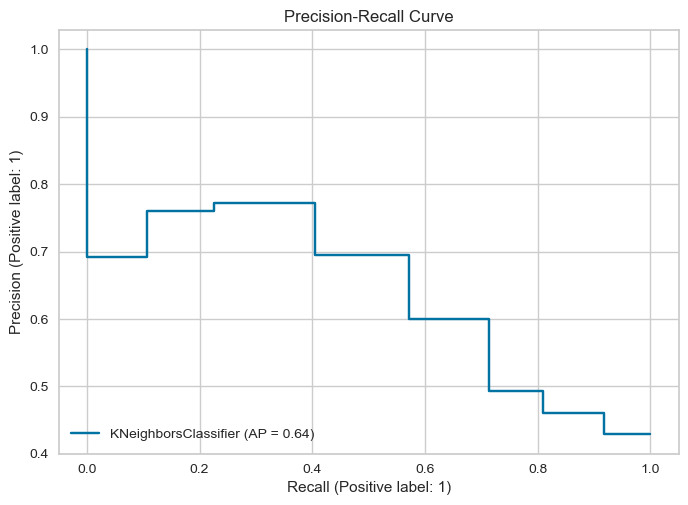

In [218]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()